# Faithless Electors Model Notebook

In [1]:
!pip install apportionpy pandas numpy plotly

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import apportionpy.apportionment as ap
import matplotlib.pyplot as plt

### Setup Electoral Vote Allocation

The 2019_Census_State_Pop.csv file contains state population data. We use pandas to read the csv into a dataframe. 

In [3]:
# Read in current state populations
df = pd.read_csv('2019_Census_State_Pop.csv')
df

,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629
5,Colorado,5758736,39.739227,-104.984856
6,Connecticut,3565287,41.764046,-72.682198
7,Delaware,973764,39.157307,-75.519722
8,District of Columbia,705749,38.895110,-77.036370
9,Florida,21477737,30.438118,-84.281296


Apportionpy is a Python package for performing different apportionments on a given set of populations. Here, we are using the status quo apportionment (Huntington Hill Method) to calculate the number of representatives in each state. 

In [4]:
# Remove DC from apportionment
# states = df[df.STATE != 'District of Columbia']
states = df

# Populations per state 
populations = list(states['POPESTIMATE2019'])

# Amount of seats to apportion
seats = 435

# method
method = 'huntington hill'
result = ap.Apportion(seats=seats, populations=populations, method=method)

# print results
print(result.method)
print("initial fair shares", result.initial_fair_shares)
print("(final) fair shares", result.fair_shares)
print("initial quotas", result.initial_quotas)
print("final quotas", result.final_quotas)
print("initial divisor", result.initial_divisor)
print("modified divisor", result.modified_divisor)

huntington hill
initial fair shares [7, 1, 10, 4, 52, 8, 5, 1, 1, 28, 14, 2, 2, 17, 9, 4, 4, 6, 6, 2, 8, 9, 13, 7, 4, 8, 2, 3, 4, 2, 12, 3, 26, 14, 1, 15, 5, 6, 17, 1, 7, 1, 9, 38, 4, 1, 11, 10, 2, 8, 1]
(final) fair shares [7, 1, 10, 4, 52, 8, 5, 1, 1, 28, 14, 2, 2, 17, 9, 4, 4, 6, 6, 2, 8, 9, 13, 7, 4, 8, 2, 3, 4, 2, 12, 3, 26, 14, 1, 15, 5, 6, 17, 1, 7, 1, 9, 38, 4, 1, 11, 10, 2, 8, 1]
initial quotas [6.497954467841461, 0.9694812863836632, 9.646132391558465, 3.999350011241638, 52.36364240329462, 7.631774921876181, 4.724902811292472, 1.2904824383381766, 0.9352950924194463, 28.46340839643494, 14.070758337654542, 1.876386835963078, 2.368311006228217, 16.793352868112716, 8.921884964474556, 4.181262017005794, 3.8608744566083226, 5.9207914307138445, 6.160822351670308, 1.7814192960547288, 8.01204795803947, 9.134301614860682, 13.235099647034279, 7.4739321382696495, 3.9441466498840847, 8.133637154962598, 1.416399907454167, 2.5635775738072835, 4.081982107925498, 1.8019593728205605, 11.7711377

In [5]:
total_pop = sum(populations)
E = 538
allocation_theoretical = [(x / total_pop) * E for x in populations]
allocation_theoretical

[8.036550583215416,
 1.1990366254584157,
 11.930159141743575,
 4.946322542639083,
 64.76238991487932,
 9.438838868895138,
 5.843672902242184,
 1.5960449467262965,
 1.1567557694750854,
 35.20302003972873,
 17.402455139444008,
 2.3206807304554853,
 2.929083497358117,
 20.76970998401067,
 11.034423243419106,
 5.1713079658600405,
 4.775058523345465,
 7.322725953388617,
 7.619591782065806,
 2.2032266236263083,
 9.909153566494794,
 11.297136250103556,
 16.368927839320556,
 9.243621816986371,
 4.878048040546294,
 10.059532849126155,
 1.7517773568053838,
 3.170585597030617,
 5.048520400146938,
 2.2286302128217508,
 14.558326725328564,
 3.4368012471185563,
 31.885300473093853,
 17.190462441660323,
 1.2490554222502936,
 19.158984093454215,
 6.485661380881302,
 6.913069106549975,
 20.98306145174358,
 1.7363424513628725,
 8.438984149998292,
 1.4499976652720152,
 11.193337043692937,
 47.52561128356258,
 5.254715788750399,
 1.0227472881137474,
 13.990116668552433,
 12.481167400429108,
 2.93741313412

We create a new dataframe apportioned_states that contains a column with the number of electors in each state. The electoral college allocates electors based on the combined number of representatives and senators from a state. The total number of electors is 538, including DC. 

In [6]:
# electors = reps + senators
electors = np.array(result.fair_shares) + 2

data = {'state': states['STATE'], 'population': populations, 'electors': allocation_theoretical}
apportioned_states = pd.DataFrame(data=data)

# add DC with 3 electors
# DC = {'state': 'District of Columbia', 'population': 705749, 'electors': 3}
# apportioned_states = apportioned_states.append(DC, ignore_index=True)
# apportioned_states.sort_values(by=['state'], inplace=True, ignore_index=True)

apportioned_states

,state,population,electors
0,Alabama,4903185,8.036551
1,Alaska,731545,1.199037
2,Arizona,7278717,11.930159
3,Arkansas,3017804,4.946323
4,California,39512223,64.762390
5,Colorado,5758736,9.438839
6,Connecticut,3565287,5.843673
7,Delaware,973764,1.596045
8,District of Columbia,705749,1.156756
9,Florida,21477737,35.203020


### Import Historical Election Data

Read in historical elections from the US_Presidential_Election_Results.csv file. The file contains election data from 1976-2020.

In [7]:
elections_df = pd.read_csv('US_Presidential_Election_Results.csv')
elections = dict()

# create dictionary of elections: key: year, value: election
for year, results in elections_df.groupby('year'):
    elections[year] = results

In [8]:
def parse_election_data(year):
    election = elections[year]
    election = election[election['party_simplified'].isin(['DEMOCRAT', 'REPUBLICAN'])]
    election['percentage'] = election['candidatevotes'] / election['totalvotes']
    # Democrats
    dems = election[election['party_simplified'] == 'DEMOCRAT'][['state', 'percentage', 'totalvotes']]
    # Republicans
    reps = election[election['party_simplified'] == 'REPUBLICAN'][['state', 'percentage']]

    # Join dataframes on state
    election_filtered = dems.join(reps.set_index('state'), on='state', lsuffix='_dem', rsuffix='_rep')

    # reorder
    election_filtered = election_filtered[['state', 'totalvotes', 'percentage_dem', 'percentage_rep']]
    return election_filtered

In [9]:
election_2020_filtered = parse_election_data(2020)
election_2020_filtered

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election['percentage'] = election['candidatevotes'] / election['totalvotes']


,state,totalvotes,percentage_dem,percentage_rep
3740,ALABAMA,2323282,0.365700,0.620316
3744,ALASKA,359530,0.427720,0.528331
3752,ARIZONA,3387326,0.493647,0.490560
3762,ARKANSAS,1219069,0.347751,0.623957
3773,CALIFORNIA,17500881,0.634839,0.343207
3784,COLORADO,3279980,0.550111,0.416041
3807,CONNECTICUT,1823857,0.592607,0.391871
3838,DELAWARE,504346,0.587430,0.397749
3842,DISTRICT OF COLUMBIA,344356,0.921497,0.053973
3849,FLORIDA,11067456,0.478615,0.512198


In [10]:
# combine dataframes
apportioned_states['state'] = apportioned_states['state'].str.lower()
election_2020_filtered['state'] = election_2020_filtered['state'].str.lower()
combined = apportioned_states.join(election_2020_filtered.set_index('state'), on='state')

# calculate margin of victory (how much democrats won by)
combined['margin'] = combined['percentage_dem'] - combined['percentage_rep']
combined

,state,population,electors,totalvotes,percentage_dem,percentage_rep,margin
0,alabama,4903185,8.036551,2323282,0.365700,0.620316,-0.254617
1,alaska,731545,1.199037,359530,0.427720,0.528331,-0.100612
2,arizona,7278717,11.930159,3387326,0.493647,0.490560,0.003087
3,arkansas,3017804,4.946323,1219069,0.347751,0.623957,-0.276207
4,california,39512223,64.762390,17500881,0.634839,0.343207,0.291632
5,colorado,5758736,9.438839,3279980,0.550111,0.416041,0.134069
6,connecticut,3565287,5.843673,1823857,0.592607,0.391871,0.200736
7,delaware,973764,1.596045,504346,0.587430,0.397749,0.189681
8,district of columbia,705749,1.156756,344356,0.921497,0.053973,0.867524
9,florida,21477737,35.203020,11067456,0.478615,0.512198,-0.033584


### Model Faithless electors

Now, we calculate the number of faithless electors in a state based on the margin of victory the state in a presidential election. Let p_i be the probability that an elector deviates from the majority. We define the following set of functions that calculate p_i based on the margin of victory. 

In [11]:
# set upper bound on deviation probability
upper_bound = 0.5

# prob of deviation is linear in respect to margin
def linear(margin, upper_bound=upper_bound):
    return -upper_bound*abs(margin) + upper_bound

# prob of deviation increases exponentially as margin decreases (possibly more realistic)
def exp(margin, exponent=100, upper_bound=upper_bound):
    return upper_bound*(exponent**(-abs(margin)))


Graph the probability of deviation vs. margin of victory 

In [12]:
x = np.linspace(0, 1, 1000)
y = np.vectorize(linear)(x)

fig = px.scatter(x=x, y=y)
fig.update_layout(
    title="Linear Deviation Plot",
    xaxis_title="Margin of Victory", 
    yaxis_title="Deviation Probability"
)
fig.show()

In [13]:
y = np.vectorize(exp)(x)

fig = px.scatter(x=x, y=y)
fig.update_layout(
    title="Exponential Deviation Plot",
    xaxis_title="Margin of Victory",
    yaxis_title="Deviation Probability"
)
fig.show()

Finally, calculate the deviation probabilities. Here, we choose the exponential mode

In [14]:
# add p_i to dataframe
p_i = combined['margin'].apply(np.abs).apply(exp)

combined['p_i'] = p_i
combined

,state,population,electors,totalvotes,percentage_dem,percentage_rep,margin,p_i
0,alabama,4903185,8.036551,2323282,0.365700,0.620316,-0.254617,0.154788
1,alaska,731545,1.199037,359530,0.427720,0.528331,-0.100612,0.314591
2,arizona,7278717,11.930159,3387326,0.493647,0.490560,0.003087,0.492942
3,arkansas,3017804,4.946323,1219069,0.347751,0.623957,-0.276207,0.140138
4,california,39512223,64.762390,17500881,0.634839,0.343207,0.291632,0.130529
5,colorado,5758736,9.438839,3279980,0.550111,0.416041,0.134069,0.269669
6,connecticut,3565287,5.843673,1823857,0.592607,0.391871,0.200736,0.198380
7,delaware,973764,1.596045,504346,0.587430,0.397749,0.189681,0.208741
8,district of columbia,705749,1.156756,344356,0.921497,0.053973,0.867524,0.009203
9,florida,21477737,35.203020,11067456,0.478615,0.512198,-0.033584,0.428354


In [15]:
# add row to dataframe for states' non-faithless votes
lst = []
for index, row in combined.iterrows():
    if row['percentage_dem'] >= row['percentage_rep']:
        lst.append('dem')
    else:
        lst.append('rep')

combined.insert(8, "non-faithless vote", lst, True)
combined

,state,population,electors,totalvotes,percentage_dem,percentage_rep,margin,p_i,non-faithless vote
0,alabama,4903185,8.036551,2323282,0.365700,0.620316,-0.254617,0.154788,rep
1,alaska,731545,1.199037,359530,0.427720,0.528331,-0.100612,0.314591,rep
2,arizona,7278717,11.930159,3387326,0.493647,0.490560,0.003087,0.492942,dem
3,arkansas,3017804,4.946323,1219069,0.347751,0.623957,-0.276207,0.140138,rep
4,california,39512223,64.762390,17500881,0.634839,0.343207,0.291632,0.130529,dem
5,colorado,5758736,9.438839,3279980,0.550111,0.416041,0.134069,0.269669,dem
6,connecticut,3565287,5.843673,1823857,0.592607,0.391871,0.200736,0.198380,dem
7,delaware,973764,1.596045,504346,0.587430,0.397749,0.189681,0.208741,dem
8,district of columbia,705749,1.156756,344356,0.921497,0.053973,0.867524,0.009203,dem
9,florida,21477737,35.203020,11067456,0.478615,0.512198,-0.033584,0.428354,rep


In [16]:
def expected_faithless(df):
    res = [] # num of faithless electors
    for i in range(df.shape[0]):
        res.append(df['p_i'].iloc[i]*df['electors'].iloc[i])
    return res

combined['exp_faithless_voters'] = expected_faithless(combined)
vote_count_faith = []
for i in range(combined.shape[0]):
    vote_count_faith.append(combined['electors'].iloc[i] - combined['exp_faithless_voters'].iloc[i])

combined

,state,population,electors,totalvotes,percentage_dem,percentage_rep,margin,p_i,non-faithless vote,exp_faithless_voters
0,alabama,4903185,8.036551,2323282,0.365700,0.620316,-0.254617,0.154788,rep,1.243961
1,alaska,731545,1.199037,359530,0.427720,0.528331,-0.100612,0.314591,rep,0.377206
2,arizona,7278717,11.930159,3387326,0.493647,0.490560,0.003087,0.492942,dem,5.880876
3,arkansas,3017804,4.946323,1219069,0.347751,0.623957,-0.276207,0.140138,rep,0.693169
4,california,39512223,64.762390,17500881,0.634839,0.343207,0.291632,0.130529,dem,8.453341
5,colorado,5758736,9.438839,3279980,0.550111,0.416041,0.134069,0.269669,dem,2.545363
6,connecticut,3565287,5.843673,1823857,0.592607,0.391871,0.200736,0.198380,dem,1.159267
7,delaware,973764,1.596045,504346,0.587430,0.397749,0.189681,0.208741,dem,0.333160
8,district of columbia,705749,1.156756,344356,0.921497,0.053973,0.867524,0.009203,dem,0.010645
9,florida,21477737,35.203020,11067456,0.478615,0.512198,-0.033584,0.428354,rep,15.079347


In [17]:
# count electoral votes
votes = []

# faithful = row['electors'] - int(row['exp_faithless_voters'])
# faithless = int(row['exp_faithless_voters'])

dem_ec = 0
rep_ec = 0

for index, row in combined.iterrows():
    if row['non-faithless vote'] == 'rep':
        rep_ec += float(row['electors']) - float(row['exp_faithless_voters'])
        dem_ec += float(row['exp_faithless_voters'])
    elif row['non-faithless vote'] == 'dem':
        dem_ec += float(row['electors']) - float(row['exp_faithless_voters'])
        rep_ec += float(row['exp_faithless_voters'])



# for index, row in combined.iterrows():

#     for i in range(row['electors'] - int(row['exp_faithless_voters'])):
#         if row['non-faithless vote'] == 'dem':
#             votes.append('dem')
#         else:
#             votes.append('rep')

#     for i in range(int(row['exp_faithless_voters'])):
#         if row['non-faithless vote'] == 'dem':
#             votes.append('rep')
#         else:
#             votes.append('dem')

# print('dem: ', votes.count('dem'))
# print('rep: ', votes.count('rep'))
print('dem: ', dem_ec)
print('rep: ', rep_ec)

# total = votes.count('dem') + votes.count('rep')
total = dem_ec + rep_ec

# print('percent dem: ', votes.count('dem') / total)
# print('percent rep: ', votes.count('rep') / total)
print('percent dem: ', dem_ec / total)
print('percent rep: ', rep_ec / total)

dem:  296.33932399975464
rep:  241.66067600024527
percent dem:  0.5508165873601388
percent rep:  0.4491834126398612


In [18]:
# compare electoral outcome with popular outcome
dem = 0
rep = 0
total = 0

for index, row in combined.iterrows():
    dem += row['population'] * row['percentage_dem']
    rep += row['population'] * row['percentage_rep']
    total += row['population']

other = total - (dem + rep)

print('dem: ', dem)
print('rep: ', rep)
print('other', other)
print('percent dem', dem / total)
print('percent rep', rep / total)
print('percent other', other / total)

dem:  167951895.4201538
rep:  154007923.51077938
other 6279704.0690668225
percent dem 0.5116748095571471
percent rep 0.46919372202103576
percent other 0.019131468421817146


## Motivating Example (toy data of two states)

In [19]:
data_pop_toy_1 = [['state1', 510, 51], ['state2', 490, 49]]
apportioned_states_toy_1 = pd.DataFrame(data_pop_toy_1, columns=['state', 'population', 'electors'])
apportioned_states_toy_1

,state,population,electors
0,state1,510,51
1,state2,490,49


In [20]:
data_election_toy_1 = [['state1', 400, 0.49, 0.51], ['state2', 350, 1.0, 0.0]]
election_filtered_toy_1 = pd.DataFrame(data_election_toy_1, columns=['state', 'totalvotes', 'percentage_dem', 'percentage_rep'])
election_filtered_toy_1

,state,totalvotes,percentage_dem,percentage_rep
0,state1,400,0.49,0.51
1,state2,350,1.00,0.00


### Combining into a function for any election year (toy data)

In [21]:
def simulate_ec_votes_toy(apportioned_states_toy, election_filtered_toy, alpha = 0.5, deviation='linear'):
    election_filtered = election_filtered_toy
    # combine dataframes
    election_filtered['state'] = election_filtered['state'].str.lower()
    combined = apportioned_states_toy.join(election_filtered.set_index('state'), on='state')
    combined.drop_duplicates(subset=['state'], inplace=True)

    # calculate margin of victory (how much democrats won by)
    combined['margin'] = combined['percentage_dem'] - combined['percentage_rep']

    p_i = combined['margin'].apply(np.abs).apply(exp, args=(100, alpha))
    if deviation == 'linear':
        p_i = combined['margin'].apply(linear, args=[alpha])

    combined['p_i'] = p_i    # add p_i to dataframe

    lst = []
    fixed_p_i = []
    for index, row in combined.iterrows():
        if row['percentage_dem'] >= row['percentage_rep']:
            lst.append('dem')
            fixed_p_i.append(row['p_i'])
        else:
            lst.append('rep')
            fixed_p_i.append(1 - row['p_i'])
    # print("got here")
    combined.insert(8, "non-faithless vote", lst, True)
    # combined['p_i'] = fixed_p_i

    combined['exp_faithless_voters'] = expected_faithless(combined)
    vote_count_faith = []
    for i in range(combined.shape[0]):
        vote_count_faith.append(combined['electors'].iloc[i] - combined['exp_faithless_voters'].iloc[i])

    rep_ec = 0
    dem_ec = 0

    for index, row in combined.iterrows():
        if row['non-faithless vote'] == 'rep':
            rep_ec += float(row['electors']) - float(row['exp_faithless_voters'])
            dem_ec += float(row['exp_faithless_voters'])
        elif row['non-faithless vote'] == 'dem':
            dem_ec += float(row['electors']) - float(row['exp_faithless_voters'])
            rep_ec += float(row['exp_faithless_voters'])

    results = {}
    dem = 0
    rep = 0
    total = 0

    for index, row in combined.iterrows():
        dem += row['population'] * row['percentage_dem']
        rep += row['population'] * row['percentage_rep']
        total += row['population']

    other = total - (dem + rep)

    results['dem_ec_count'] = dem_ec
    results['rep_ec_count'] = rep_ec


    # compare electoral outcome with popular outcome
    dem = 0
    rep = 0
    total = 0

    for index, row in combined.iterrows():
        dem += row['totalvotes'] * row['percentage_dem']
        rep += row['totalvotes'] * row['percentage_rep']
        total += row['totalvotes']

    other = total - (dem + rep)

    results['dem_pop_count'] = dem
    results['rep_pop_count'] = rep
    results['other_pop_count'] = other
    results['dem_pop_prop'] = dem / total
    results['rep_pop_prop'] = rep / total
    results['other_pop_prop'] = other / total

    pop_dem_states = 0
    pop_rep_states = 0
    

    for index, row in combined.iterrows():
        if row['percentage_dem'] > row['percentage_rep']:
            pop_dem_states += row['population']
        elif row['percentage_dem'] < row['percentage_rep']:
            pop_rep_states += row['population']
            
    return results, combined, (pop_dem_states, pop_rep_states)

### Methods to compute $\alpha$ bound

In [22]:
def alpha_bound_linear(dataset):
    dem_win_pop = 0
    rep_win_pop = 0
    rep_in_dem_win = 0
    dem_in_rep_win = 0

    for i in range(dataset.shape[0]):
        if dataset["percentage_dem"][i] > dataset["percentage_rep"][i]:
            dem_win_pop += dataset["population"][i]
            rep_in_dem_win += dataset["population"][i]*dataset["percentage_rep"][i]
        else:
            rep_win_pop += dataset["population"][i]
            dem_in_rep_win += dataset["population"][i]*dataset["percentage_dem"][i]
    
    return 0.25*abs(dem_win_pop - rep_win_pop)/abs(rep_in_dem_win - dem_in_rep_win)

def alpha_bound_exp(dataset):
    dem_win_pop = 0
    rep_win_pop = 0
    temp_dem = 0
    temp_rep = 0

    for i in range(dataset.shape[0]):
        if dataset["percentage_dem"][i] > dataset["percentage_rep"][i]:
            dem_win_pop += dataset["population"][i]
            temp_dem += dataset["population"][i]/(100**(dataset["percentage_dem"][i] -dataset["percentage_rep"][i] ))
        else:
            rep_win_pop += dataset["population"][i]
            temp_rep += dataset["population"][i]/(100**(dataset["percentage_rep"][i] -dataset["percentage_dem"][i] ))
    
    return 0.5*abs(dem_win_pop - rep_win_pop)/abs(temp_dem - temp_rep)

# alpha_bound_exp(simulate_ec_votes(2008)[1])

### Plot results (toy)

In [23]:
def plot_results_toy(apportioned_states_toy, election_filtered_toy, alphas, title='Motivating Example Simulation', deviation = "linear"):
    x = alphas
    dem = []
    rep = []
    plt.ylim(200, 300)     # set the ylim to bottom, top
    if deviation == "linear":
        for alpha in x:
            dem.append(simulate_ec_votes_toy(apportioned_states_toy=apportioned_states_toy,election_filtered_toy=election_filtered_toy,alpha=alpha)[0]['dem_ec_count'])
            rep.append(simulate_ec_votes_toy(apportioned_states_toy=apportioned_states_toy,election_filtered_toy=election_filtered_toy, alpha=alpha)[0]['rep_ec_count'])
        alpha_bound = alpha_bound_linear(simulate_ec_votes_toy(apportioned_states_toy=apportioned_states_toy,election_filtered_toy=election_filtered_toy)[1])
        plt.axvline(x=alpha_bound, color='grey', linestyle=':', label=(r'$\alpha$ bound = ' + f'{alpha_bound}'))
        plt.plot(x, dem, color='blue')
        plt.plot(x, rep, color='red')
        plt.xlabel(r'$\alpha$')
        plt.legend(loc='upper right')
        plt.ylabel('Electoral College Votes')
        plt.suptitle(f'{title} with Linear Deviation')
    elif deviation == "exp":
        for alpha in x:
            dem.append(simulate_ec_votes_toy(apportioned_states_toy=apportioned_states_toy,election_filtered_toy=election_filtered_toy, alpha=alpha, deviation = "exp")[0]['dem_ec_count'])
            rep.append(simulate_ec_votes_toy(apportioned_states_toy=apportioned_states_toy,election_filtered_toy=election_filtered_toy, alpha=alpha, deviation = "exp")[0]['rep_ec_count'])
        alpha_bound = alpha_bound_exp(simulate_ec_votes_toy(apportioned_states_toy=apportioned_states_toy,election_filtered_toy=election_filtered_toy)[1])
        plt.axvline(x=alpha_bound, color='grey', linestyle=':', label=(r'$\alpha$ bound = ' + f'{alpha_bound}'))
        plt.plot(x, dem, color='blue')
        plt.plot(x, rep, color='red')
        plt.xlabel(r'$\alpha$')
        plt.legend(loc='upper right')
        plt.ylabel('Electoral College Votes')
        plt.suptitle(f'{title} with Exponential Deviation')
    return

### Toy Examples

In [24]:
x = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
xx = [x_i + 0.5 for x_i in x]
x = x + xx

In [25]:
def generate_toy_data(total_pop, states_a_prop, states_b_prop, electors, num_states_a, num_states_b, states_a_dem_prop, states_b_dem_prop):

    # random extreme example
    states_a_pop = round(states_a_prop * total_pop)
    states_b_pop = round(states_b_prop * total_pop)
    states_a_proportion = states_a_pop / total_pop
    states_b_proportion = states_b_pop / total_pop
    electors_a = electors * states_a_proportion
    electors_b = electors * states_b_proportion

    lst_states_a = []
    lst_states_b = []
    
    for i in range(num_states_a):
        lst_states_a.append([('state' + str(i + 1)), states_a_pop/num_states_a, electors_a/num_states_a])
    for i in range(num_states_b):
        lst_states_b.append([('state' + str(num_states_a + i + 1)), states_b_pop/num_states_b, electors_b/num_states_b])

    data_pop_toy_2 = lst_states_a + lst_states_b
    apportioned_states_toy_2 = pd.DataFrame(data_pop_toy_2, columns=['state', 'population', 'electors'])

    lst_states_a_votes = []
    lst_states_b_votes = []

    for i in range(num_states_a):
        lst_states_a_votes.append([('state' + str(i + 1)), (states_a_pop/num_states_a), states_a_dem_prop, 1-states_a_dem_prop])
    for i in range(num_states_b):
        lst_states_b_votes.append([('state' + str(num_states_a + i + 1)), (states_b_pop/num_states_b), states_b_dem_prop, 1-states_b_dem_prop])

    data_election_toy_2 = lst_states_a_votes + lst_states_b_votes
    election_filtered_toy_2 = pd.DataFrame(data_election_toy_2, columns=['state', 'totalvotes', 'percentage_dem', 'percentage_rep'])
    
    
    return apportioned_states_toy_2, election_filtered_toy_2

In [26]:
apportioned_states_toy_2, election_filtered_toy_2 = generate_toy_data(total_pop=100000, 
                                                                      states_a_prop = 0.51, 
                                                                      states_b_prop = 0.49, 
                                                                      electors = 538, 
                                                                      num_states_a = 3, 
                                                                      num_states_b = 10, 
                                                                      states_a_dem_prop = 0.49, 
                                                                      states_b_dem_prop = 0.3)

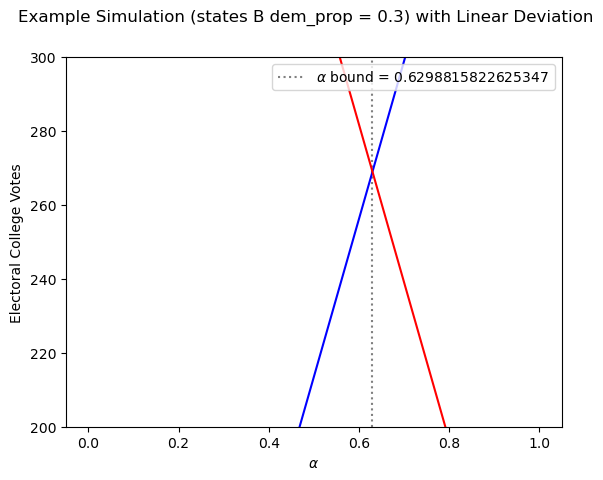

In [27]:
plot_results_toy(apportioned_states_toy_2, election_filtered_toy_2, x, title='Example Simulation (states B dem_prop = 0.3)', deviation = "linear")

## Historical Presidential Election Simulations

In [28]:
def simulate_ec_votes(year, alpha = 0.5, deviation = 'linear'):
    election_filtered = parse_election_data(year)
    # combine dataframes
    election_filtered['state'] = election_filtered['state'].str.lower()
    combined = apportioned_states.join(election_filtered.set_index('state'), on='state')
    combined.drop_duplicates(subset=['state'], inplace=True)
    
    # calculate margin of victory (how much democrats won by)
    combined['margin'] = combined['percentage_dem'] - combined['percentage_rep']

    p_i = combined['margin'].apply(np.abs).apply(exp, args=(100, alpha))
    if deviation == 'linear':
        p_i = combined['margin'].apply(linear, args=[alpha])

    combined['p_i'] = p_i    # add p_i to dataframe

    # add row to dataframe for states' non-faithless votes
    lst = []
    for index, row in combined.iterrows():
        if row['percentage_dem'] >= row['percentage_rep']:
            lst.append('dem')
        else:
            lst.append('rep')
    combined.insert(8, "non-faithless vote", lst, True)
    combined['exp_faithless_voters'] = expected_faithless(combined)
    vote_count_faith = []
    for i in range(combined.shape[0]):
        vote_count_faith.append(combined['electors'].iloc[i] - combined['exp_faithless_voters'].iloc[i])

    # Count electoral votes
    rep_ec = 0
    dem_ec = 0
    for index, row in combined.iterrows():
        if row['non-faithless vote'] == 'rep':
            rep_ec += float(row['electors']) - float(row['exp_faithless_voters'])
            dem_ec += float(row['exp_faithless_voters'])
        elif row['non-faithless vote'] == 'dem':
            dem_ec += float(row['electors']) - float(row['exp_faithless_voters'])
            rep_ec += float(row['exp_faithless_voters'])

    results = {}
    dem = 0
    rep = 0
    total = 0

    for index, row in combined.iterrows():
        dem += row['population'] * row['percentage_dem']
        rep += row['population'] * row['percentage_rep']
        total += row['population']

    other = total - (dem + rep)

    results['dem_ec_count'] = dem_ec
    results['rep_ec_count'] = rep_ec

    # compare electoral outcome with popular outcome
    dem = 0
    rep = 0
    total = 0

    for index, row in combined.iterrows():
        dem += row['totalvotes'] * row['percentage_dem']
        rep += row['totalvotes'] * row['percentage_rep']
        total += row['totalvotes']

    other = total - (dem + rep)

    results['dem_pop_count'] = dem
    results['rep_pop_count'] = rep
    results['other_pop_count'] = other
    results['dem_pop_prop'] = dem / total
    results['rep_pop_prop'] = rep / total
    results['other_pop_prop'] = other / total

    pop_dem_states = 0
    pop_rep_states = 0
    
    for index, row in combined.iterrows():
        if row['percentage_dem'] > row['percentage_rep']:
            pop_dem_states += row['population']
        elif row['percentage_dem'] < row['percentage_rep']:
            pop_rep_states += row['population']
        
    return results, combined.copy(), (pop_dem_states, pop_rep_states)

In [29]:
results, combined, pops = simulate_ec_votes(2016, alpha=0.2)

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Plotting Results

In [30]:
# goes dem_ec_real, rep_ec_real
dict_ec_actual = {
    2020: (306, 232),
    2016: (227, 304),
    2012: (332, 206),
    2008: (365, 173),
    2004: (251, 286),
    2000: (266, 271)
}

def plot_results(alphas, year):
    x = alphas
    dem = []
    rep = []
    plt.ylim(200, 330)
    for alpha in x:
        dem.append(simulate_ec_votes(year, alpha=alpha)[0]['dem_ec_count'])
        rep.append(simulate_ec_votes(year, alpha=alpha)[0]['rep_ec_count'])
    plt.axvline(x=alpha_bound_linear(simulate_ec_votes(year)[1]), color='grey', linestyle=':', label=(r'$\alpha$ bound = ' + f'{alpha_bound_linear(simulate_ec_votes(year)[1])}'))
    plt.plot(x, dem, color='blue')
    plt.plot(x, rep, color='red')
    plt.axhline(y=dict_ec_actual[year][0], color='blue', linestyle='--', label='D true elector votes')
    plt.axhline(y=dict_ec_actual[year][1], color='red', linestyle='--', label='R true elector votes')
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Electoral College Votes')
    plt.suptitle(f'{year} Simulation Under Naive Apportionment and Proportional Faithless Electors')
    plt.legend(loc='upper left')
    return

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

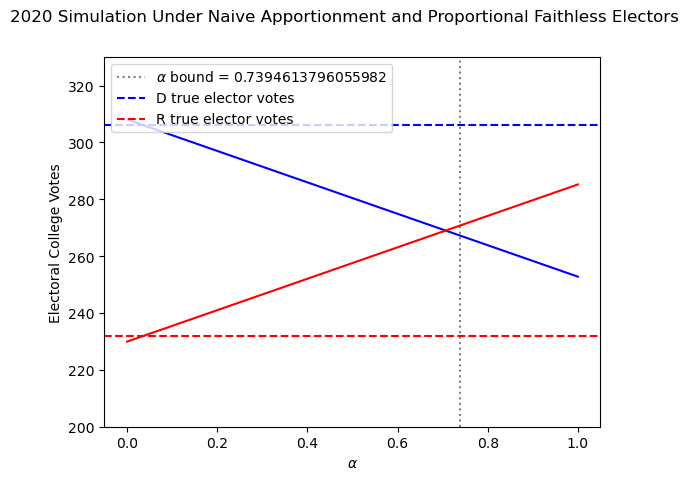

In [31]:
x = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
xx = [x_i + 0.5 for x_i in x]
x = x + xx
plot_results(x, 2020)

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

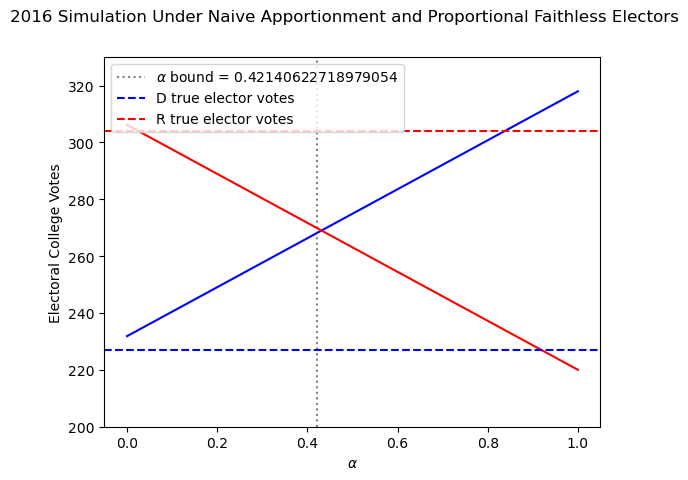

In [32]:
plot_results(x, 2016)

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

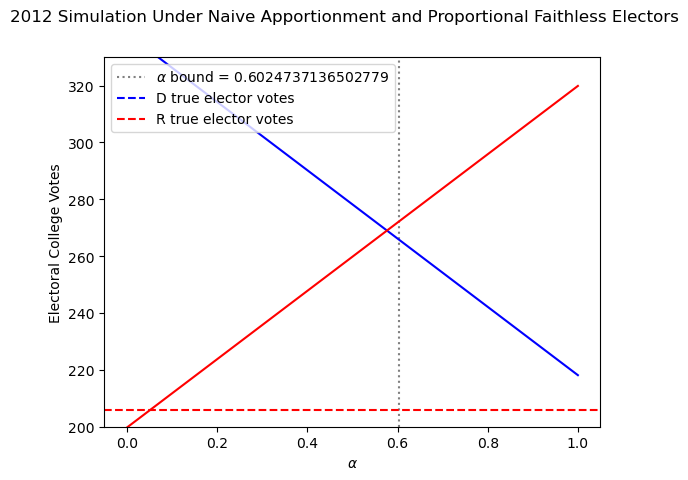

In [33]:
plot_results(x, 2012)

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

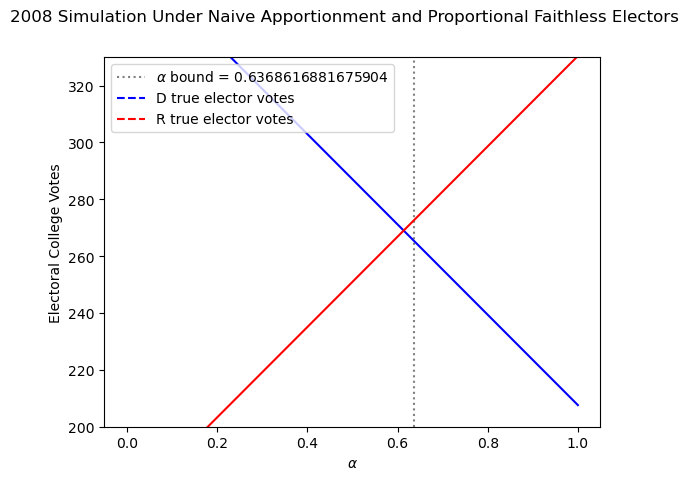

In [34]:
plot_results(x, 2008)

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

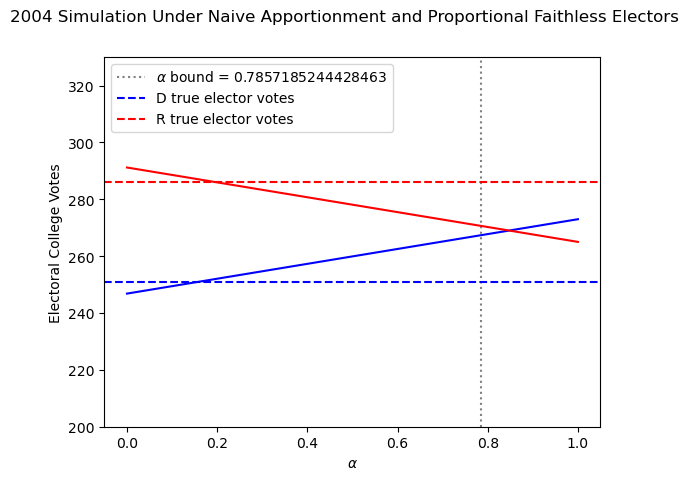

In [35]:
plot_results(x, 2004)

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4h/2rbwqh8d0cz9qkm7gsk8f8600000gn/T/ipykernel_13262/2603376406.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

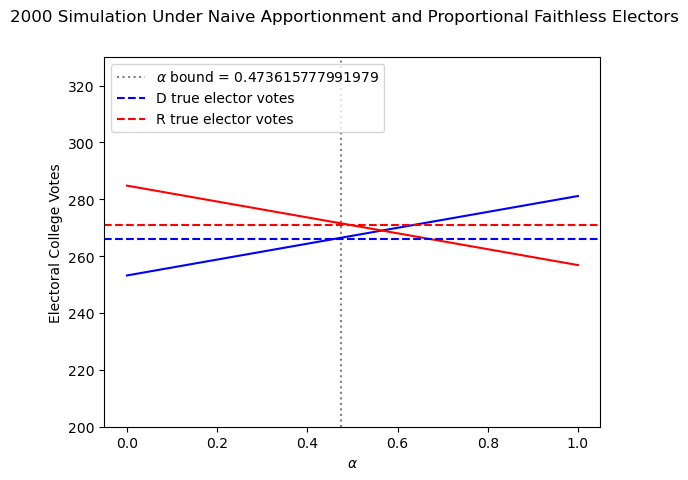

In [36]:
plot_results(x, 2000)